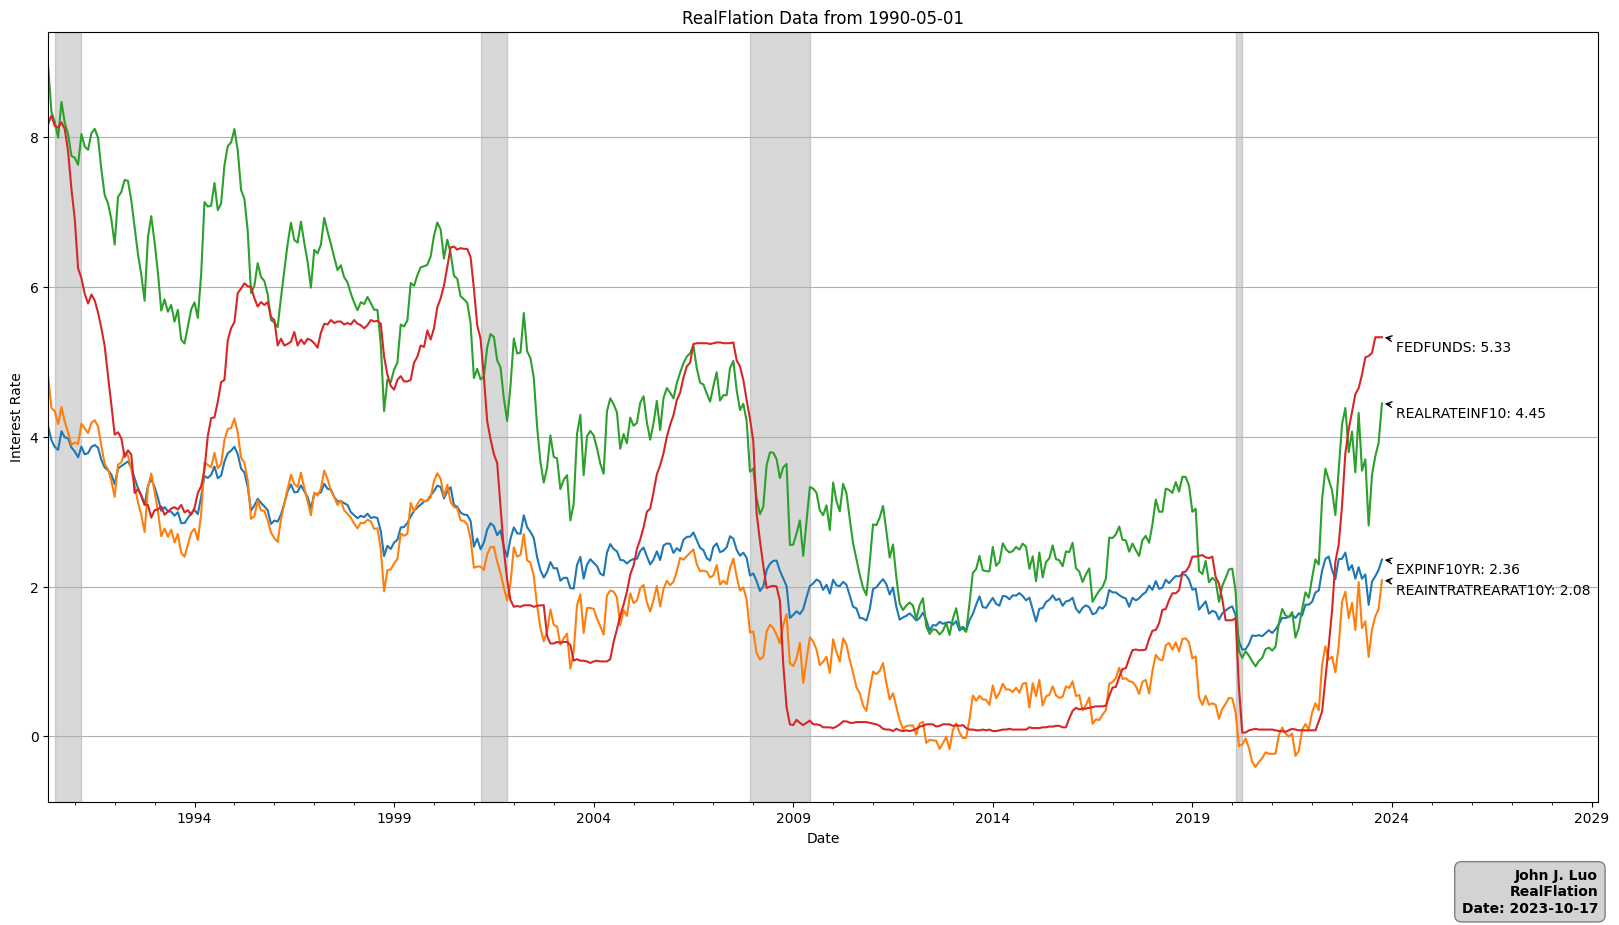

In [173]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mpl_dates
import math, dateutil.parser, datetime, sys, pandas_market_calendars as mcal

from statsmodels.stats.weightstats import DescrStatsW
from datetime import date

from scipy import stats
import yfinance as yf

yf.pdr_override()
import pandas_datareader.data as pdr

def constructDF():
    RealFlation = pd.read_csv('RealRate.csv')
    RealFlation.index = pd.to_datetime(RealFlation['Date'], format='mixed')
#     SP500.drop(columns=['Date','Volume','Adj Close**'], inplace=True)
    return RealFlation

def constructRec():
    recessions_df = pd.read_csv('recessions.csv', parse_dates=['start', 'end'])
#     SP500.drop(columns=['Date','Volume','Adj Close**'], inplace=True)
    return recessions_df

# def signaturebar(fig, text):
#     fig.text(0.1, 0.02, text, ha='left', va='center', fontsize=11, color='black', weight='bold')
# import matplotlib.patches as patches

# def signaturebar(fig, text):
#     fig.text(0.1, 0.02, text, ha='left', va='center', fontsize=12, color='black', weight='bold', bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))

def signaturebar(fig, text):
    fig.text(0.90, 0.02, text, ha='right', va='center', fontsize=10, color='black', weight='bold', bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))


if __name__ == "__main__":
    arbitrary_start_date = None
    if arbitrary_start_date is None:
        arbitrary_start_date = RealFlation.index[1]
    offsetDays = 2000
    
    RealFlation = constructDF()
    RealFlation_filtered = RealFlation.loc[arbitrary_start_date:]
#     RealFlation.plot(figsize=(16,8))
    RealFlation_filtered.plot(figsize=(20, 10), legend=None)
    plt.title('RealFlation Data from {}'.format(arbitrary_start_date.date()))
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    
    x_min = RealFlation_filtered.index.min()
    x_max = RealFlation_filtered.index.max() + pd.DateOffset(days=offsetDays)
    plt.xlim(x_min, x_max)  # Set extended x-axis limits
    
    recessions_df = constructRec()
    plt.grid(True, which='major', axis='y')
#     plt.legend(loc='upper right')
    for _, row in recessions_df.iterrows():
        plt.axvspan(row['start'], row['end'], color='grey', alpha=0.3, label='Recession Period')

    for column in ['EXPINF10YR', 'REAINTRATREARAT10Y', 'REALRATEINF10', 'FEDFUNDS']:
        end_date = RealFlation_filtered.index[-1]
        end_value = RealFlation_filtered[column].iloc[-1]
        plt.annotate(f'{column}: {end_value:.2f}', xy=(end_date, end_value),
                     xytext=(10, -10), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->"))
        
    signature_text = 'John J. Luo\nRealFlation\nDate: {}'.format(pd.Timestamp.now().date())
#     signature_text = '“Look at my men. Their courage hangs by a thread.” — Theoden'
    signaturebar(plt.gcf(), signature_text)
    
    plt.show()